
# Практическая работа 4-2: Линейная регрессия 2

Name: Makarova Katya

Email: makarovakatya0237@gmail.com


## ##  Анализ набора кредитных данных

Вспомните набор данных «Кредит», рассмотренный на занятии и доступный [здесь](http://www-bcf.usc.edu/~gareth/ISL/data.html).
Этот набор данных состоит из информации о кредитных картах 400 человек.

Сначала импортируйте данные и преобразуйте доход в тысячи.

In [20]:
# imports and setup

import scipy as sc
import numpy as np

import pandas as pd
import statsmodels.formula.api as sm     #Last lecture: used statsmodels.formula.api.ols() for OLS
from sklearn import linear_model         #Last lecture: used sklearn.linear_model.LinearRegression() for OLS

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
from google.colab import files

uploaded = files.upload()

Saving Credit.csv to Credit.csv


In [3]:
# Import data from Credit.csv file
credit = pd.read_csv('Credit.csv',index_col=0) #load data
credit["Income"] = credit["Income"].map(lambda x: 1000*x)
credit

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14891.0,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106025.0,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104593.0,7075,514,4,71,11,Male,No,No,Asian,580
4,148924.0,9504,681,3,36,11,Female,No,No,Asian,964
5,55882.0,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
396,12096.0,4100,307,3,32,13,Male,No,Yes,Caucasian,560
397,13364.0,3838,296,5,65,17,Male,No,No,African American,480
398,57872.0,4171,321,5,67,12,Female,No,Yes,Caucasian,138
399,37728.0,2525,192,1,44,13,Male,No,Yes,Caucasian,0


Limit - лимит (максимальную сумму, которую вы можете взять взаймы, которая определяется банком)
Rating -  Кредитный рейтинг — это оценка способности держателя карты выплатить заемные деньги и вероятности того, что владелец карты не сможет выплатить заемные деньги.

In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 1 to 400
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 37.5+ KB


In [5]:
credit.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45218.885000,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35244.273165,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10354.000000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21007.250000,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33115.500000,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57470.750000,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186634.000000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [9]:
credit.corr()

ValueError: could not convert string to float: ' Male'

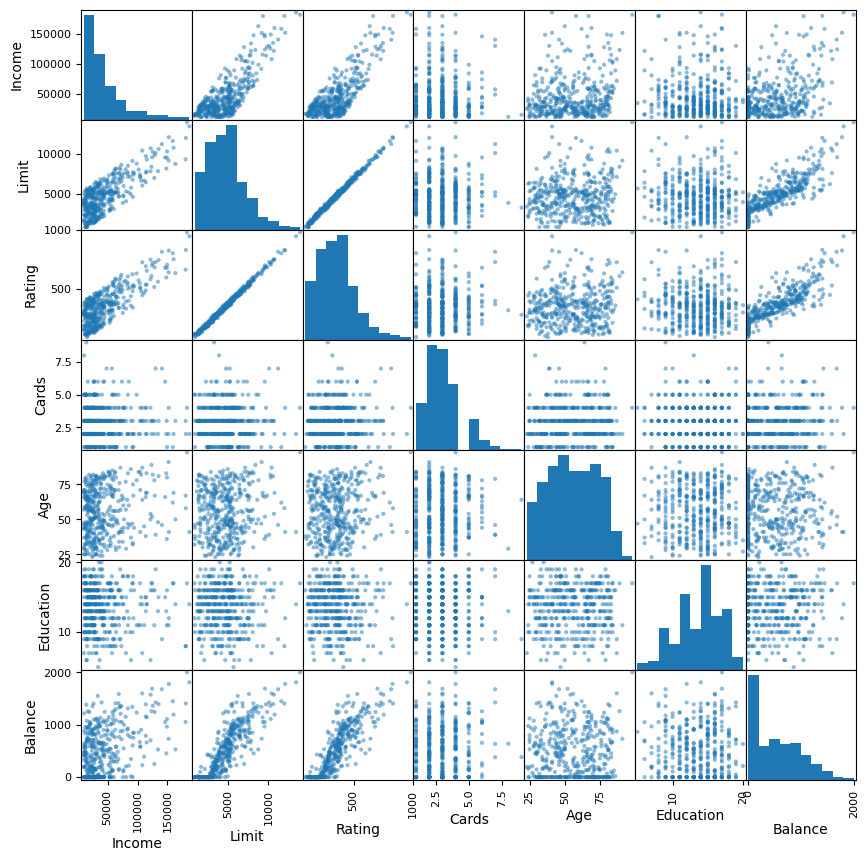

In [7]:
pd.plotting.scatter_matrix(credit, figsize=(10, 10), diagonal='hist');

Из корреляционной матрицы видно, что лимит связан с доходом (79%), рейтингом (99%), и балансом карты (86%).

## Задание 1. Первая регрессионная модель

**Упражнение:** Лимит средств по рейтингу:


$$
\text{Limit} = \beta_0 + \beta_1 \text{Rating}.
$$

Поскольку кредитные рейтинги в основном используются банками для определения кредитных лимитов, ожидаем, что рейтинг будет в прямой зависимости для лимита, поэтому эта регрессия должна быть очень хорошей.

Используйте функцию `ols` из библиотеки Python `statsmodels`. Каково значение $R^2$? Что такое $H_0$ и $H_A$ для соответствующей проверки гипотезы и каково значение $p$?


**Проверка данных на нормальность**

In [11]:
import seaborn as sns

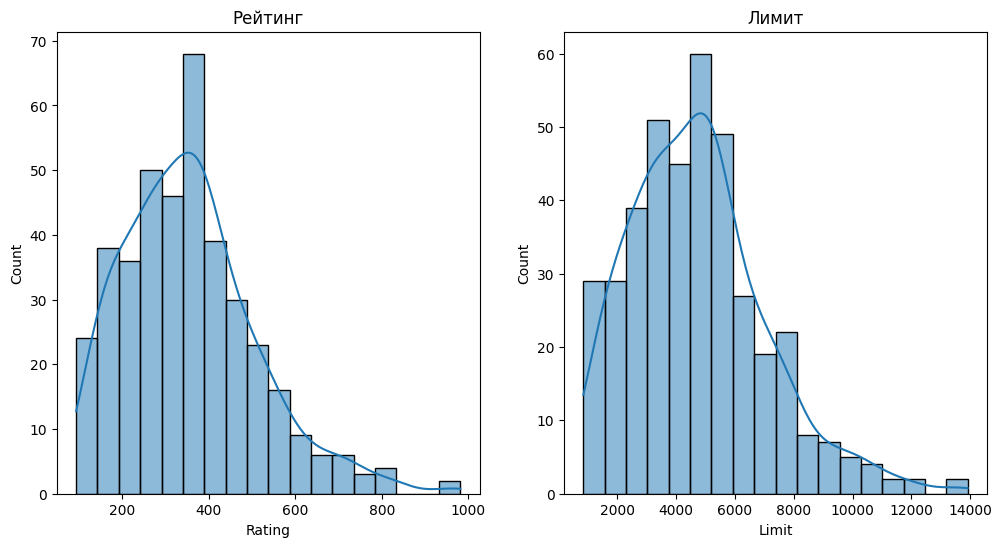

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(credit['Rating'], kde=True)
plt.title('Рейтинг')

plt.subplot(1, 2, 2)
sns.histplot(credit['Limit'], kde=True)
plt.title('Лимит')

plt.show()

можно заметить, что данные распределены со смещение влево.

In [22]:
model1 = sm.ols(formula="Limit ~ Rating", data=credit).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Limit   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 6.348e+04
Date:                Sat, 06 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:27:50   Log-Likelihood:                -2649.1
No. Observations:                 400   AIC:                             5302.
Df Residuals:                     398   BIC:                             5310.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -542.9282     22.850    -23.760      0.0

**Ваш ответ:**

$R^2$ = 0.994 - модель объясняет 99,4% изменчивости лимита от рейтинга.

Prob (F-statistic):	0 -  модель статистически значима

P>t не превышает 0.5 - оба коэффициента регрессии значимы.

$\hat{\beta}_0$ = -542.93

$\beta_1$ = 14.87

Уравнение линейной регрессии : $$
\text{Limit} = -542.93 + (14.87)\text{Rating}.
$$

уравнение показывает, что без рейтинга лимит будет равна примерно -543, а также что с увеличением рейтинга на единицу, лимит будет увеличиваться на 15 единиц.


$H_0$ - Рейтинг не влияет на лимит кредитной карты

$H_A$ - Чем больше рейтинг у вледльца кредитной карты, тем больше лимит на кредитной карте

Так как объём данных составляет 400 строк, установим уровень значимости = 0.01

In [13]:
from scipy.stats import ttest_ind
# Разделение данных на две группы: с высоким рейтингом и с низким рейтингом
high_rating = credit[credit['Rating'] > credit['Rating'].mean()]
low_rating = credit[credit['Rating'] <= credit['Rating'].mean()]

# Выполнение t-теста для проверки гипотезы
t_statistic, p_value = ttest_ind(high_rating['Limit'], low_rating['Limit'])

# Уровень значимости
alpha = 0.01

if p_value < alpha:
    print("Отвергаем нулевую гипотезу. Существует статистически значимая связь между рейтингом и лимитом кредитной карты.")
    print("P значение = ", p_value)
else:
    print("Не удалось отвергнуть нулевую гипотезу. Рейтинг не влияет на лимит кредитной карты.")
    print("P значение = ", p_value)

Отвергаем нулевую гипотезу. Существует статистически значимая связь между рейтингом и лимитом кредитной карты.
P значение =  1.1273048484541778e-80


## Задание 2: Прогнозирование лимита без рейтинга

Поскольку `Рейтинг` и `Лимит` — это практически одна и та же переменная, исключим `Рейтинг` и просто попробуем спрогнозировать `Лимит` на основе вещественнозначных переменных (некатегориальных переменных): Доход, Карты, Возраст, Образование, Баланс.

**Упражнение.** Разработайте модель множественной линейной регрессии для прогнозирования рейтинга. Интерпретируйте результаты.

А пока просто сосредоточьтесь на переменных с численными значениями (доход, карты, возраст, образование, баланс).

В первом приближении не использовать категориальные переменные (Пол, Студент, Семейное положение, Этническая принадлежность).



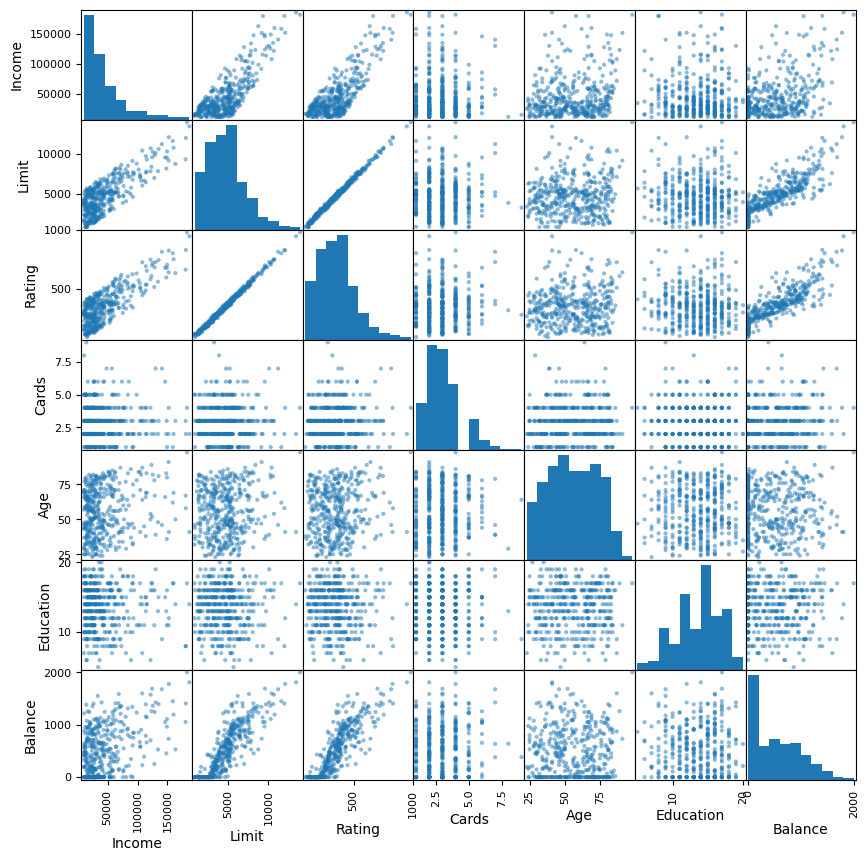

In [14]:
pd.plotting.scatter_matrix(credit, figsize=(10, 10), diagonal='hist');

Из корреляционной матрицы видно, что лимит связан с доходом  и балансом карты, c остальными вещественными перемеными нет связи. Построим модель на переменных, которые имеют корреляционную зависимость.

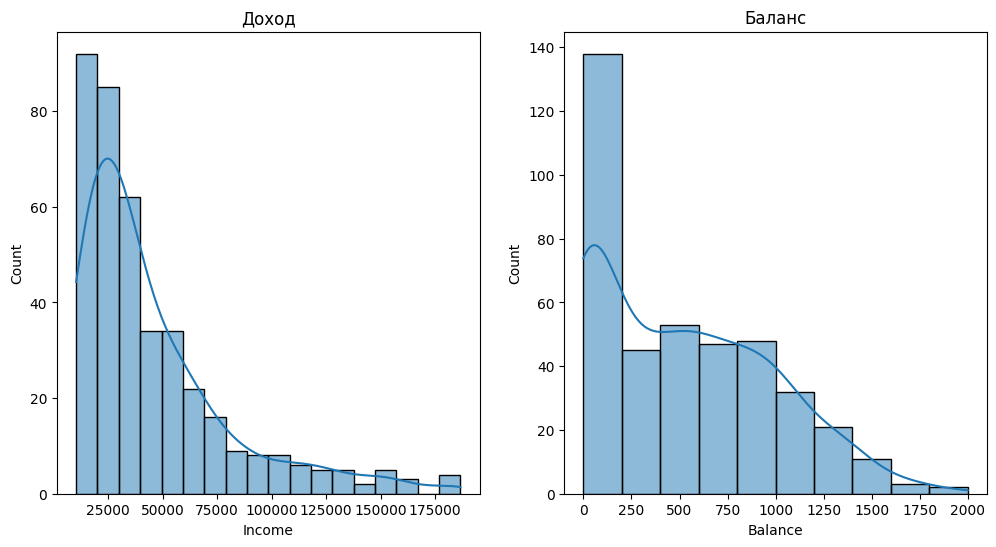

In [23]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(credit['Income'], kde=True)
plt.title('Доход')

plt.subplot(1, 2, 2)
sns.histplot(credit['Balance'], kde=True)
plt.title('Баланс')

plt.show()

In [21]:
model2 = sm.ols(formula="Limit ~ Income + Balance", data=credit).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Limit   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     3046.
Date:                Sat, 06 Apr 2024   Prob (F-statistic):          1.37e-241
Time:                        17:26:45   Log-Likelihood:                -3106.0
No. Observations:                 400   AIC:                             6218.
Df Residuals:                     397   BIC:                             6230.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1610.3665     49.710     32.395      0.0

R² = 0.939, что означает, что около 93.9% изменчивости зависимой переменной (Limit) объясняется независимыми переменными (Income и Balance) в модели.

Prob(F-statistic) = 3046, с очень низким p-value (1.37e-241), что говорит о статистической значимости модели в целом.


Intercept: 1610.3665,
Income: 0.0327,
Balance: 3.1621.
Коэффициенты показывают, на сколько увеличивается зависимая переменная при увеличении соответствующей независимой переменной на одну единицу, учитывая другие переменные в модели.

Какие независимые переменные являются хорошими/плохими предикторами? Какая модель в целом является лучшей?

**Ваш ответ:**

Обе модели являются хорошими, тк R² имеет различие на 5.5%. Все использованные независимые переменные как в простой, так и в множественной регресси являются хорошо и значимыми.


## Задание 3. Включение категориальных переменных в модель регрессии

Рассмотреть двоичные категориальные переменные, которые были ранее сопоставлены с целочисленными значениями 0, 1 в в `лекции 4.2`.

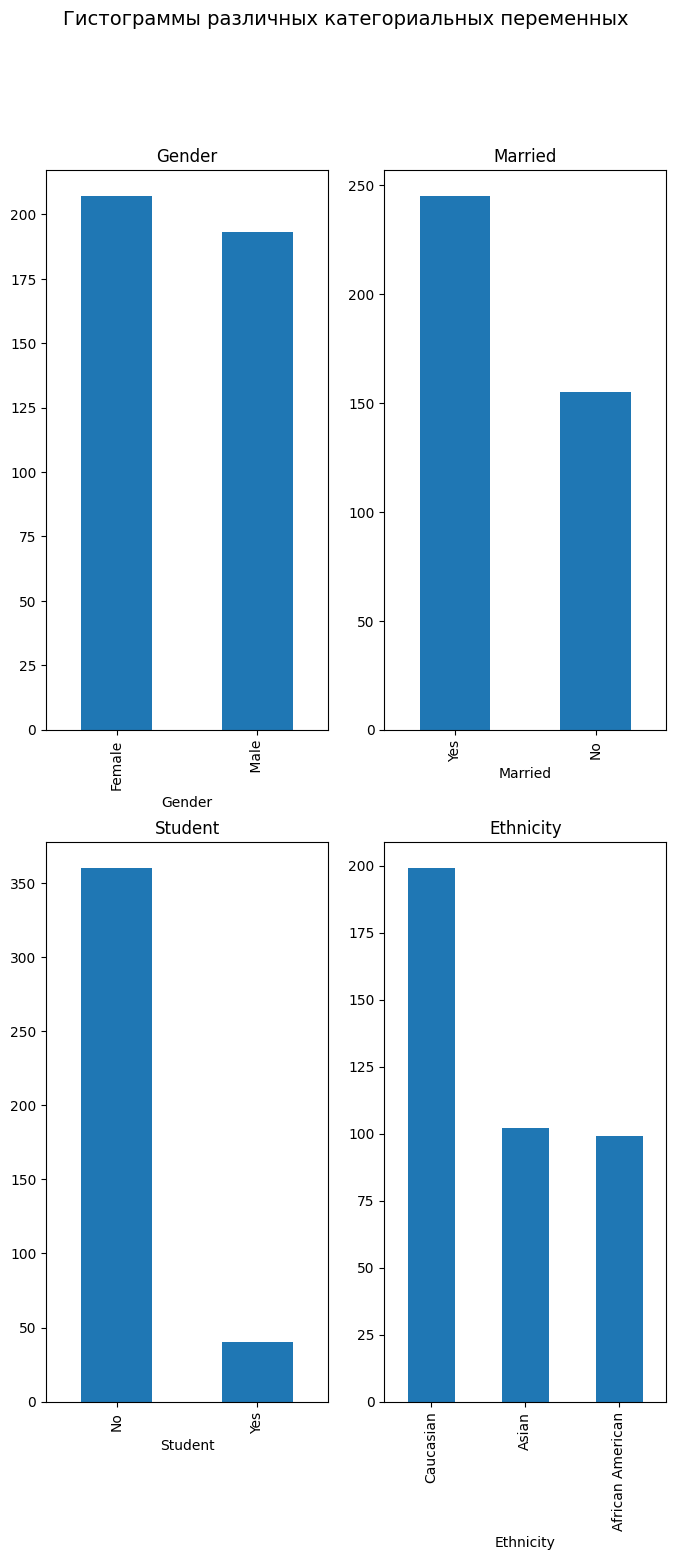

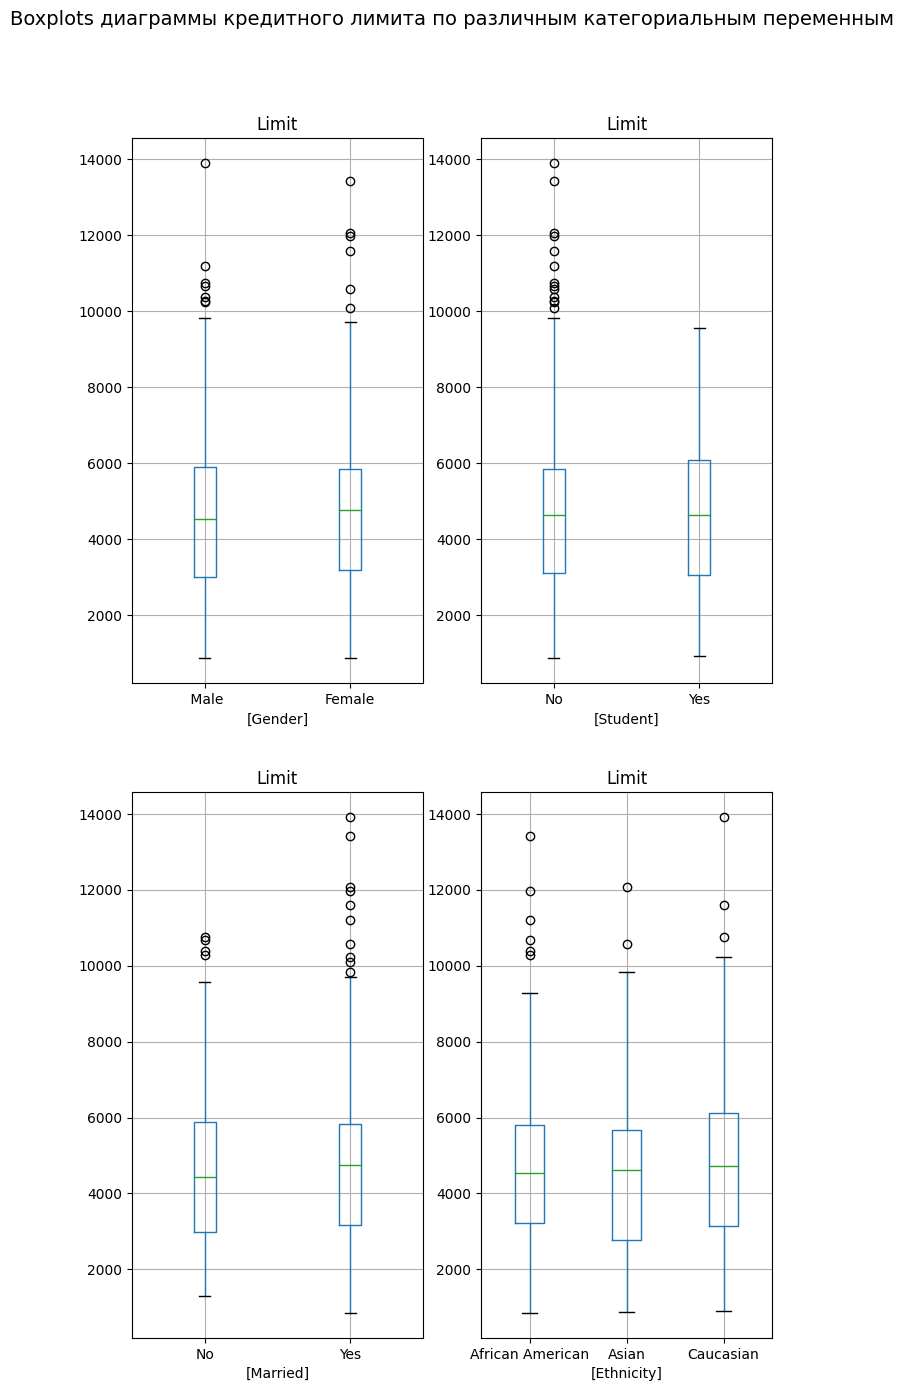

In [27]:
# Plot Categorical variables: Gender, Student, Married, Ethnicity

# Barplots
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(8,16))
credit["Gender"].value_counts().plot(kind='bar',ax=axes[0,0],title='Gender');
credit["Student"].value_counts().plot(kind='bar',ax=axes[1,0],title='Student');
credit["Married"].value_counts().plot(kind='bar',ax=axes[0,1],title='Married');
credit["Ethnicity"].value_counts().plot(kind='bar',ax=axes[1,1],title='Ethnicity');
fig.suptitle('Гистограммы различных категориальных переменных',fontsize=14)
plt.show()

# Side-by-side boxplots for Limit by categories
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(8,16))
credit.boxplot(column=['Limit'], by=['Gender'],ax=axes[0,0])
credit.boxplot(column=['Limit'], by=['Student'],ax=axes[0,1])
credit.boxplot(column=['Limit'], by=['Married'],ax=axes[1,0])
credit.boxplot(column=['Limit'], by=['Ethnicity'],ax=axes[1,1])
fig.suptitle('Boxplots диаграммы кредитного лимита по различным категориальным переменным', fontsize=14)
plt.show()

In [36]:
credit["Gender_num"] = credit["Gender"].map({' Male':0, 'Female':1})
credit["Student_num"] = credit["Student"].map({'Yes':1, 'No':0})
credit["Married_num"] = credit["Married"].map({'Yes':1, 'No':0})

In [38]:
credit_new = credit.select_dtypes(include=np.number)
credit_new.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_num,Student_num,Married_num
1,14891.0,3606,283,2,34,11,333,0,0,1
2,106025.0,6645,483,3,82,15,903,1,1,1
3,104593.0,7075,514,4,71,11,580,0,0,0
4,148924.0,9504,681,3,36,11,964,1,0,0
5,55882.0,4897,357,2,68,16,331,0,0,1


In [39]:
credit_new.isnull().sum()

Income         0
Limit          0
Rating         0
Cards          0
Age            0
Education      0
Balance        0
Gender_num     0
Student_num    0
Married_num    0
dtype: int64

<Axes: >

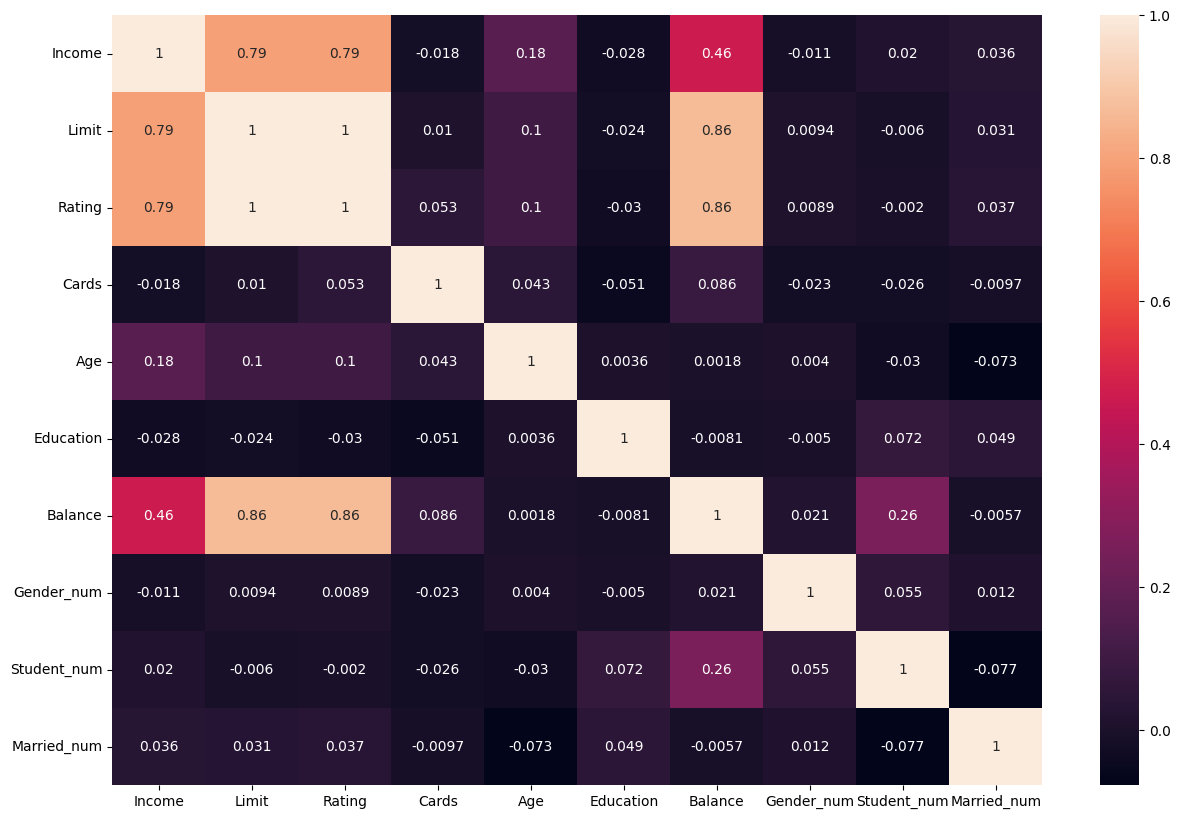

In [41]:
sns.heatmap(credit_new.corr(), annot = True)

In [51]:
model_k4 = sm.ols(formula="Limit ~ Gender_num + Student_num + Married_num", data=credit).fit()
print(model_k4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Limit   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.1413
Date:                Sat, 06 Apr 2024   Prob (F-statistic):              0.935
Time:                        18:27:34   Log-Likelihood:                -3664.5
No. Observations:                 400   AIC:                             7337.
Df Residuals:                     396   BIC:                             7353.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4627.6933    224.561     20.608      

R^2 = 0.001, что значит, что объясняет отсутствие вариации между независимыми и зависимой переменной.

Prob (F-statistic): 0,935 - модель статистически не значима

P>t превышают 0.5 - коэффициенты не значимы

In [58]:
model_k1 = sm.ols(formula="Limit ~ Student_num", data=credit).fit()
print(model_k1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Limit   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.01440
Date:                Sat, 06 Apr 2024   Prob (F-statistic):              0.905
Time:                        18:34:59   Log-Likelihood:                -3664.8
No. Observations:                 400   AIC:                             7334.
Df Residuals:                     398   BIC:                             7341.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4740.2222    121.803     38.917      

In [57]:
model3 = sm.ols(formula="Limit ~ Income + Balance + Student_num", data=credit_new).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Limit   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     4875.
Date:                Sat, 06 Apr 2024   Prob (F-statistic):          3.55e-312
Time:                        18:32:45   Log-Likelihood:                -2937.6
No. Observations:                 400   AIC:                             5883.
Df Residuals:                     396   BIC:                             5899.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1671.8940     32.784     50.998      

При добавлении независимой переменной "Student_num" - является ли человек студентом, модель значительно улудшилась, при этом независимая переменная стала статистически значимой и отрицательно влияющей.

Можете ли улучшить модель, которая разработана в задании `2`, включив в нее одну или несколько из этих переменных?


In [61]:
model4 = sm.ols(formula="Limit ~ Income + Balance + Gender_num", data=credit_new).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Limit   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     2026.
Date:                Sat, 06 Apr 2024   Prob (F-statistic):          8.51e-240
Time:                        18:39:31   Log-Likelihood:                -3106.0
No. Observations:                 400   AIC:                             6220.
Df Residuals:                     396   BIC:                             6236.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1607.4134     57.891     27.766      0.0

In [62]:
model5 = sm.ols(formula="Limit ~ Income + Balance + Married_num", data=credit_new).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Limit   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     2036.
Date:                Sat, 06 Apr 2024   Prob (F-statistic):          3.38e-240
Time:                        18:39:53   Log-Likelihood:                -3105.0
No. Observations:                 400   AIC:                             6218.
Df Residuals:                     396   BIC:                             6234.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1562.4867     60.808     25.696      

При добавлении других независимых категориальных переменных модель не улудшилась.